In [2]:
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
df = pd.read_csv('/Users/nurassylkaiyrzhan/Desktop/DataAnalysis/kolesa.kz-analysis/data/kolesa_almaty_data.csv')

In [4]:
# split the 'brand' column into two new columns 'brand' and 'model'
df[['brand', 'model']] = df['brand'].str.split(' ', n=1, expand=True)

In [5]:
df

,brand,model,year,city,price,mileage,engine_volume_liters,body_style,color,transmission,drive_type,url,parsed_at
0,ГАЗ,ГАЗель,2011,Алматы,5400000,NaN,2.9,Фургон,белый металлик,Механика,Задний привод,https://kolesa.kz/a/show/185584438,2025-04-07 09:11:19
1,Infiniti,QX56,2011,Алматы,14500000,218688.0,5.6,Внедорожник,черный,Автомат,Полный привод,https://kolesa.kz/a/show/185584296,2025-04-07 09:11:27
2,Chery,Tiggo 2,2023,Алматы,5600000,17134.0,1.5,Кроссовер,серый,Вариатор,Передний привод,https://kolesa.kz/a/show/184249228,2025-04-07 09:11:38
3,Toyota,Windom,2001,Алматы,5200000,NaN,3.0,Седан,NaN,Автомат,Передний привод,https://kolesa.kz/a/show/184510195,2025-04-07 09:11:47
4,BMW,735,2000,Алматы,3900000,NaN,3.5,Седан,черный металлик,Автомат,Задний привод,https://kolesa.kz/a/show/185584229,2025-04-07 09:11:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,Toyota,Avensis,2005,Алматы,4200000,NaN,2.0,Седан,серый металлик,Механика,Передний привод,https://kolesa.kz/a/show/167800837,2025-04-08 12:51:01
7246,Kia,Cerato,2023,Алматы,11400000,24000.0,2.0,Седан,серый металлик,Автомат,Передний привод,https://kolesa.kz/a/show/185527620,2025-04-08 12:51:08
7247,Toyota,Voxy,2008,Алматы,6500000,140000.0,2.0,Минивэн,черный,Вариатор,Передний привод,https://kolesa.kz/a/show/184922357,2025-04-08 12:51:18
7248,Mercedes-Benz,S 320,1998,Алматы,3500000,NaN,3.2,Седан,серый металлик,Автомат,Задний привод,https://kolesa.kz/a/show/185300508,2025-04-08 12:51:24


In [18]:
# check for missing values
df.isnull().sum()

brand                      0
model                      0
year                       0
city                       0
price                      0
mileage                 2156
engine_volume_liters     294
body_style                 2
color                   1179
transmission               0
drive_type                 0
url                        0
parsed_at                  0
dtype: int64

In [19]:
# fill missing values in 'mileage' with the mean mileage
avg_mileage_by_year = df.groupby('year')['mileage'].mean()

In [20]:
df.describe()

,year,price,mileage,engine_volume_liters
count,7250.000000,7.250000e+03,5094.000000,6956.000000
mean,2013.211172,1.445496e+07,138632.335493,2.603378
std,10.003942,1.958553e+07,120692.408412,1.083496
min,1954.000000,1.100000e+05,1.000000,0.800000
25%,2006.000000,5.300000e+06,36052.250000,1.800000
50%,2015.000000,9.500000e+06,116000.000000,2.400000
75%,2022.000000,1.610000e+07,208800.000000,3.000000
max,2025.000000,4.250000e+08,999999.000000,6.800000


In [21]:
df[df['year']==2025]

,brand,model,year,city,price,mileage,engine_volume_liters,body_style,color,transmission,drive_type,url,parsed_at
70,Cadillac,Escalade,2025,Алматы,110000000,NaN,6.2,Внедорожник,черный,Автомат,Полный привод,https://kolesa.kz/a/show/182725168,2025-04-07 22:38:46
113,Geely,Coolray,2025,Алматы,5889201,NaN,1.5,Кроссовер,NaN,Робот,Передний привод,https://kolesa.kz/a/show/185241241,2025-04-07 22:43:42
142,Leapmotor,C16,2025,Алматы,13550000,NaN,1.5,Кроссовер,NaN,Автомат,Задний привод,https://kolesa.kz/a/show/185279463,2025-04-07 22:47:30
189,BYD,Song L,2025,Алматы,18500000,NaN,NaN,Лифтбек,NaN,Автомат,Полный привод,https://kolesa.kz/a/show/183403857,2025-04-07 22:52:50
190,Li,L7,2025,Алматы,23237130,NaN,1.5,Кроссовер,NaN,Автомат,Полный привод,https://kolesa.kz/a/show/185235901,2025-04-07 22:52:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6774,BYD,Song Plus,2025,Алматы,14800000,NaN,1.5,Кроссовер,белый,Вариатор,Передний привод,https://kolesa.kz/a/show/183451342,2025-04-08 11:37:15
6777,Toyota,Land Cruiser Prado,2025,Алматы,47790000,NaN,2.4,Внедорожник,бежевый металлик,Автомат,Полный привод,https://kolesa.kz/a/show/184180709,2025-04-08 11:37:26
6778,Denza,N9,2025,Алматы,33550100,NaN,2.0,Кроссовер,серебристый,Вариатор,Полный привод,https://kolesa.kz/a/show/184347868,2025-04-08 11:37:30
6784,BYD,Sea Lion 07,2025,Алматы,17600000,NaN,NaN,Кроссовер,белый,Автомат,Полный привод,https://kolesa.kz/a/show/182466841,2025-04-08 11:37:54


In [22]:
# fill missing values in 'mileage' for the year 2025 with 0 
df.loc[(df['year'] == 2025) & (df['mileage'].isnull()), 'mileage'] = 0

In [23]:
df[df['year']==2025]

,brand,model,year,city,price,mileage,engine_volume_liters,body_style,color,transmission,drive_type,url,parsed_at
70,Cadillac,Escalade,2025,Алматы,110000000,0.0,6.2,Внедорожник,черный,Автомат,Полный привод,https://kolesa.kz/a/show/182725168,2025-04-07 22:38:46
113,Geely,Coolray,2025,Алматы,5889201,0.0,1.5,Кроссовер,NaN,Робот,Передний привод,https://kolesa.kz/a/show/185241241,2025-04-07 22:43:42
142,Leapmotor,C16,2025,Алматы,13550000,0.0,1.5,Кроссовер,NaN,Автомат,Задний привод,https://kolesa.kz/a/show/185279463,2025-04-07 22:47:30
189,BYD,Song L,2025,Алматы,18500000,0.0,NaN,Лифтбек,NaN,Автомат,Полный привод,https://kolesa.kz/a/show/183403857,2025-04-07 22:52:50
190,Li,L7,2025,Алматы,23237130,0.0,1.5,Кроссовер,NaN,Автомат,Полный привод,https://kolesa.kz/a/show/185235901,2025-04-07 22:52:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6774,BYD,Song Plus,2025,Алматы,14800000,0.0,1.5,Кроссовер,белый,Вариатор,Передний привод,https://kolesa.kz/a/show/183451342,2025-04-08 11:37:15
6777,Toyota,Land Cruiser Prado,2025,Алматы,47790000,0.0,2.4,Внедорожник,бежевый металлик,Автомат,Полный привод,https://kolesa.kz/a/show/184180709,2025-04-08 11:37:26
6778,Denza,N9,2025,Алматы,33550100,0.0,2.0,Кроссовер,серебристый,Вариатор,Полный привод,https://kolesa.kz/a/show/184347868,2025-04-08 11:37:30
6784,BYD,Sea Lion 07,2025,Алматы,17600000,0.0,NaN,Кроссовер,белый,Автомат,Полный привод,https://kolesa.kz/a/show/182466841,2025-04-08 11:37:54


In [24]:
# fill missing values in 'mileage' for other years with the average mileage for that year
for year, avg_mileage in avg_mileage_by_year.items():
    df.loc[(df['year'] == year) & (df['mileage'].isnull()), 'mileage'] = avg_mileage

In [25]:
df.isnull().sum()

brand                      0
model                      0
year                       0
city                       0
price                      0
mileage                    3
engine_volume_liters     294
body_style                 2
color                   1179
transmission               0
drive_type                 0
url                        0
parsed_at                  0
dtype: int64

In [26]:
# check if there are still any missing values in 'mileage'
df[pd.isnull(df['mileage'])]

,brand,model,year,city,price,mileage,engine_volume_liters,body_style,color,transmission,drive_type,url,parsed_at
1015,Mercedes-Benz,E 230,1982,Алматы,10900000,NaN,2.3,Седан,жёлтый металлик,Автомат,Задний привод,https://kolesa.kz/a/show/164739447,2025-04-08 00:34:37
2565,Ford,Mustang,1978,Алматы,35000000,NaN,5.0,Купе,синий металлик,Автомат,Задний привод,https://kolesa.kz/a/show/173123358,2025-04-08 03:39:59
4493,ВАЗ,(Lada) 2102,1977,Алматы,2000000,NaN,1.2,Универсал,белый,Механика,Задний привод,https://kolesa.kz/a/show/183238445,2025-04-08 07:25:15


In [27]:
# fill any remaining missing values in 'mileage' with the median mileage
median_mileage = df['mileage'].median()
df['mileage'].fillna(median_mileage, inplace=True)

In [28]:
df.isnull().sum()

brand                      0
model                      0
year                       0
city                       0
price                      0
mileage                    0
engine_volume_liters     294
body_style                 2
color                   1179
transmission               0
drive_type                 0
url                        0
parsed_at                  0
dtype: int64

In [29]:
df[pd.isnull(df['engine_volume_liters'])]

,brand,model,year,city,price,mileage,engine_volume_liters,body_style,color,transmission,drive_type,url,parsed_at
114,Li,Mega,2024,Алматы,34997000,500.000000,NaN,Минивэн,серый металлик,Автомат,Полный привод,https://kolesa.kz/a/show/184620410,2025-04-07 22:43:48
170,BMW,i4,2023,Алматы,55000000,250.000000,NaN,Лифтбек,серый металлик,Автомат,Полный привод,https://kolesa.kz/a/show/169110808,2025-04-07 22:50:44
189,BYD,Song L,2025,Алматы,18500000,0.000000,NaN,Лифтбек,NaN,Автомат,Полный привод,https://kolesa.kz/a/show/183403857,2025-04-07 22:52:50
196,Zeekr,7X,2025,Алматы,19850000,0.000000,NaN,Кроссовер,NaN,Автомат,Полный привод,https://kolesa.kz/a/show/184787247,2025-04-07 22:53:36
209,Porsche,Taycan,2020,Алматы,44500000,66800.000000,NaN,Седан,серебристый металлик,Автомат,Полный привод,https://kolesa.kz/a/show/182430030,2025-04-07 22:55:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,Volkswagen,ID.4,2022,Алматы,13900000,22000.000000,NaN,Кроссовер,NaN,Автомат,Полный привод,https://kolesa.kz/a/show/184476818,2025-04-08 11:53:20
7039,Honda,e:NS1,2023,Алматы,9500000,20000.000000,NaN,Кроссовер,белый,Автомат,Передний привод,https://kolesa.kz/a/show/185581935,2025-04-08 11:55:44
7138,Tesla,Model S,2020,Алматы,27000000,38000.000000,NaN,Лифтбек,белый,Автомат,Полный привод,https://kolesa.kz/a/show/157056517,2025-04-08 12:03:20
7186,Hongqi,E-QM5,2024,Алматы,7700000,8339.296729,NaN,Седан,NaN,Автомат,Передний привод,https://kolesa.kz/a/show/185126582,2025-04-08 12:12:44


In [30]:
# fill missing values in 'engine_volume_liters' with 0 for ELECTRIC cars
df.loc[df['engine_volume_liters'].isnull(), 'engine_volume_liters'] = 0 

In [31]:
df.isnull().sum()

brand                      0
model                      0
year                       0
city                       0
price                      0
mileage                    0
engine_volume_liters       0
body_style                 2
color                   1179
transmission               0
drive_type                 0
url                        0
parsed_at                  0
dtype: int64

In [32]:
df[pd.isnull(df['body_style'])]

,brand,model,year,city,price,mileage,engine_volume_liters,body_style,color,transmission,drive_type,url,parsed_at
4843,Ретро-автомобили,Американские,1988,Алматы,15000000,56280.0,5.0,NaN,синий металлик,Автомат,Задний привод,https://kolesa.kz/a/show/184781107,2025-04-08 08:04:46
5749,Ретро-автомобили,СССР,1955,Алматы,1000000,5.0,2.5,NaN,бирюзовый,Механика,Задний привод,https://kolesa.kz/a/show/184573497,2025-04-08 10:11:09


In [33]:
# drop retro cars with missing 'body_style'
df.dropna(subset=['body_style'], inplace=True)

In [34]:
df.isnull().sum()

brand                      0
model                      0
year                       0
city                       0
price                      0
mileage                    0
engine_volume_liters       0
body_style                 0
color                   1179
transmission               0
drive_type                 0
url                        0
parsed_at                  0
dtype: int64

In [35]:
df[pd.isnull(df['color'])]

,brand,model,year,city,price,mileage,engine_volume_liters,body_style,color,transmission,drive_type,url,parsed_at
3,Toyota,Windom,2001,Алматы,5200000,249873.728814,3.0,Седан,NaN,Автомат,Передний привод,https://kolesa.kz/a/show/184510195,2025-04-07 09:11:47
20,BMW,328,1998,Алматы,3100000,320066.978723,2.8,Седан,NaN,Механика,Задний привод,https://kolesa.kz/a/show/185582442,2025-04-07 09:14:05
23,Kia,Sportage,2019,Алматы,11000000,68000.000000,2.0,Кроссовер,NaN,Автомат,Полный привод,https://kolesa.kz/a/show/185582374,2025-04-07 09:14:28
25,Hyundai,Elantra,2022,Алматы,11000000,28000.000000,1.6,Седан,NaN,Автомат,Передний привод,https://kolesa.kz/a/show/185582305,2025-04-07 09:14:46
28,Toyota,Camry,2000,Алматы,3500000,239759.791667,2.2,Седан,NaN,Автомат,Передний привод,https://kolesa.kz/a/show/185575593,2025-04-07 09:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7210,ВАЗ,(Lada) Lada 2121,2012,Алматы,1900000,200000.000000,1.7,Внедорожник,NaN,Механика,Полный привод,https://kolesa.kz/a/show/185546728,2025-04-08 12:14:54
7219,Opel,Meriva,2003,Алматы,2500000,256123.478873,1.6,Минивэн,NaN,Механика,Передний привод,https://kolesa.kz/a/show/181921864,2025-04-08 12:15:42
7228,Chevrolet,Nexia,2020,Алматы,4190000,120493.000000,1.5,Седан,NaN,Автомат,Передний привод,https://kolesa.kz/a/show/184994507,2025-04-08 12:48:20
7231,Porsche,Cayenne,2007,Алматы,10000000,158000.000000,3.6,Кроссовер,NaN,Автомат,Полный привод,https://kolesa.kz/a/show/160444841,2025-04-08 12:49:00


In [36]:
df['color'].mode()

0    белый
Name: color, dtype: object

In [37]:
# fill missing values in 'color' with the mode of the column
df['color'].fillna(df['color'].mode()[0], inplace=True)

In [38]:
df.isnull().sum()

brand                   0
model                   0
year                    0
city                    0
price                   0
mileage                 0
engine_volume_liters    0
body_style              0
color                   0
transmission            0
drive_type              0
url                     0
parsed_at               0
dtype: int64

In [39]:
df.duplicated().sum()

0

### looking for outliers

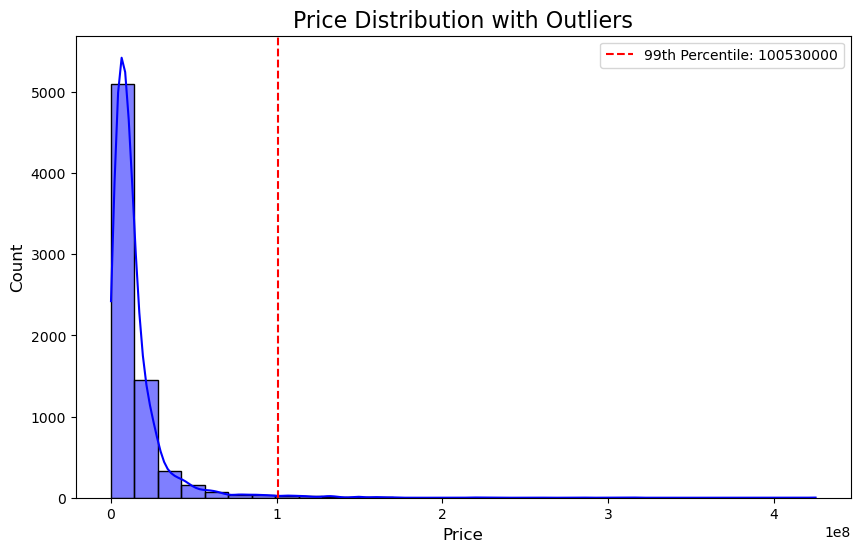

In [40]:
# upper limit for outliers
upper_limit = df['price'].quantile(0.99)

# histogram with outlier threshold line
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.axvline(upper_limit, color='red', linestyle='--', label=f'99th Percentile: {upper_limit:.0f}')
plt.title('Price Distribution with Outliers', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.show()

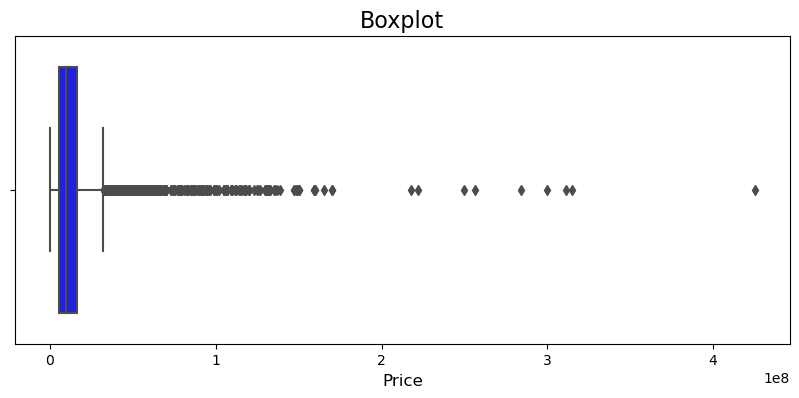

In [41]:
# boxplot to visualize outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'], color='blue')
plt.title('Boxplot', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.show()

In [42]:
upper_limit = df['price'].quantile(0.99) # upper limit for outliers

outliers = df[df['price'] > upper_limit] # filter outliers

In [43]:
outliers

,brand,model,year,city,price,mileage,engine_volume_liters,body_style,color,transmission,drive_type,url,parsed_at
70,Cadillac,Escalade,2025,Алматы,110000000,0.000000,6.2,Внедорожник,черный,Автомат,Полный привод,https://kolesa.kz/a/show/182725168,2025-04-07 22:38:46
162,Rolls-Royce,Ghost,2018,Алматы,127000000,14000.000000,6.6,Седан,белый,Автомат,Задний привод,https://kolesa.kz/a/show/179301982,2025-04-07 22:49:49
281,Mercedes-Benz,S 600,1993,Алматы,222000000,38400.000000,6.0,Седан,черный,Автомат,Задний привод,https://kolesa.kz/a/show/185333774,2025-04-07 23:03:34
944,Lamborghini,Huracan,2023,Алматы,250000000,280.000000,5.2,Купе,черный,Робот,Задний привод,https://kolesa.kz/a/show/183686266,2025-04-08 00:24:33
1054,Mercedes-Benz,G 63 AMG,2023,Алматы,115000000,8000.000000,4.0,Внедорожник,черный,Автомат,Полный привод,https://kolesa.kz/a/show/185177093,2025-04-08 00:39:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5891,Lexus,LX 700h,2025,Алматы,117000000,0.000000,3.4,Внедорожник,белый,Автомат,Полный привод,https://kolesa.kz/a/show/185156372,2025-04-08 10:29:13
6083,Mercedes-Benz,G 63 AMG,2021,Алматы,105000000,27000.000000,4.0,Внедорожник,черный металлик,Автомат,Полный привод,https://kolesa.kz/a/show/185477856,2025-04-08 10:56:25
6142,Mercedes-Benz,G 63 AMG,2022,Алматы,105000000,25000.000000,4.0,Внедорожник,белый,Автомат,Полный привод,https://kolesa.kz/a/show/185480612,2025-04-08 10:59:38
6434,Porsche,911,2023,Алматы,115000000,635.000000,3.0,Кабриолет,синий металлик,Робот,Полный привод,https://kolesa.kz/a/show/162537855,2025-04-08 11:16:17


In [44]:
# drop ony one outlier because of the high price for the 1993-th year car
df = df[~((df['brand'] == 'Mercedes-Benz') & (df['model'] == 'S 600'))]

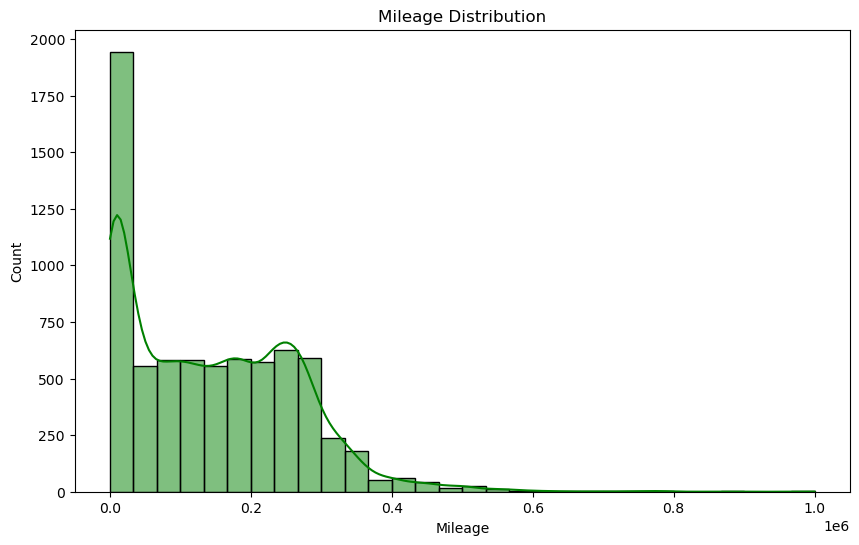

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mileage'], kde=True, bins=30, color='green')
plt.title('Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.show()

In [46]:
lower_bound = df['mileage'].quantile(0.01)
upper_bound = df['mileage'].quantile(0.99) 

In [47]:
df[(df['mileage'] > upper_bound)]

,brand,model,year,city,price,mileage,engine_volume_liters,body_style,color,transmission,drive_type,url,parsed_at
37,Honda,Civic,1990,Алматы,1000000,500000.0,1.6,Универсал,белый,Механика,Полный привод,https://kolesa.kz/a/show/184542929,2025-04-07 09:16:15
258,Toyota,Camry,1998,Алматы,2607000,678678.0,2.2,Седан,белый,Механика,Передний привод,https://kolesa.kz/a/show/185573116,2025-04-07 23:01:02
380,Nissan,Cefiro,1997,Алматы,3456000,505505.0,2.0,Седан,синий металлик,Автомат,Передний привод,https://kolesa.kz/a/show/179514475,2025-04-07 23:15:05
389,Mitsubishi,Pajero,1999,Алматы,3200000,500000.0,3.5,Внедорожник,белый металлик,Автомат,Полный привод,https://kolesa.kz/a/show/167480298,2025-04-07 23:16:08
439,Toyota,Land Cruiser,1996,Алматы,5000000,482700.0,4.5,Внедорожник,черный,Автомат,Полный привод,https://kolesa.kz/a/show/185500990,2025-04-07 23:21:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,BMW,525,1989,Алматы,2000000,744364.0,2.5,Седан,белый металлик,Механика,Задний привод,https://kolesa.kz/a/show/185580482,2025-04-08 12:00:17
7146,Mitsubishi,Lancer,2008,Алматы,3750000,500000.0,1.8,Седан,зеленый металлик,Автомат,Передний привод,https://kolesa.kz/a/show/185580491,2025-04-08 12:03:57
7161,Honda,Accord,1994,Алматы,1700000,554000.0,2.3,Седан,белый,Механика,Передний привод,https://kolesa.kz/a/show/185580265,2025-04-08 12:10:27
7192,Volkswagen,Passat,1994,Алматы,2200000,999999.0,2.0,Универсал,серебристый металлик,Механика,Передний привод,https://kolesa.kz/a/show/184417534,2025-04-08 12:13:19


In [48]:
df['mileage'] = df['mileage'].round(0).astype(int) # round mileage to the nearest integer

/var/folders/bj/818f_3ds0qn5fsqkh5fhm9rh0000gn/T/ipykernel_65224/389079186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = df['mileage'].round(0).astype(int) # round mileage to the nearest integer


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7242 entries, 0 to 7249
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 7242 non-null   object 
 1   model                 7242 non-null   object 
 2   year                  7242 non-null   int64  
 3   city                  7242 non-null   object 
 4   price                 7242 non-null   int64  
 5   mileage               7242 non-null   int64  
 6   engine_volume_liters  7242 non-null   float64
 7   body_style            7242 non-null   object 
 8   color                 7242 non-null   object 
 9   transmission          7242 non-null   object 
 10  drive_type            7242 non-null   object 
 11  url                   7242 non-null   object 
 12  parsed_at             7242 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 792.1+ KB


In [50]:
df

,brand,model,year,city,price,mileage,engine_volume_liters,body_style,color,transmission,drive_type,url,parsed_at
0,ГАЗ,ГАЗель,2011,Алматы,5400000,193650,2.9,Фургон,белый металлик,Механика,Задний привод,https://kolesa.kz/a/show/185584438,2025-04-07 09:11:19
1,Infiniti,QX56,2011,Алматы,14500000,218688,5.6,Внедорожник,черный,Автомат,Полный привод,https://kolesa.kz/a/show/185584296,2025-04-07 09:11:27
2,Chery,Tiggo 2,2023,Алматы,5600000,17134,1.5,Кроссовер,серый,Вариатор,Передний привод,https://kolesa.kz/a/show/184249228,2025-04-07 09:11:38
3,Toyota,Windom,2001,Алматы,5200000,249874,3.0,Седан,белый,Автомат,Передний привод,https://kolesa.kz/a/show/184510195,2025-04-07 09:11:47
4,BMW,735,2000,Алматы,3900000,239760,3.5,Седан,черный металлик,Автомат,Задний привод,https://kolesa.kz/a/show/185584229,2025-04-07 09:11:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,Toyota,Avensis,2005,Алматы,4200000,242503,2.0,Седан,серый металлик,Механика,Передний привод,https://kolesa.kz/a/show/167800837,2025-04-08 12:51:01
7246,Kia,Cerato,2023,Алматы,11400000,24000,2.0,Седан,серый металлик,Автомат,Передний привод,https://kolesa.kz/a/show/185527620,2025-04-08 12:51:08
7247,Toyota,Voxy,2008,Алматы,6500000,140000,2.0,Минивэн,черный,Вариатор,Передний привод,https://kolesa.kz/a/show/184922357,2025-04-08 12:51:18
7248,Mercedes-Benz,S 320,1998,Алматы,3500000,320067,3.2,Седан,серый металлик,Автомат,Задний привод,https://kolesa.kz/a/show/185300508,2025-04-08 12:51:24


In [51]:
df.dtypes

brand                    object
model                    object
year                      int64
city                     object
price                     int64
mileage                   int64
engine_volume_liters    float64
body_style               object
color                    object
transmission             object
drive_type               object
url                      object
parsed_at                object
dtype: object

In [52]:
df['parsed_at'] = pd.to_datetime(df['parsed_at'])

/var/folders/bj/818f_3ds0qn5fsqkh5fhm9rh0000gn/T/ipykernel_65224/1614454369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_at'] = pd.to_datetime(df['parsed_at'])


In [53]:
df['parsed_at']

0      2025-04-07 09:11:19
1      2025-04-07 09:11:27
2      2025-04-07 09:11:38
3      2025-04-07 09:11:47
4      2025-04-07 09:11:53
               ...        
7245   2025-04-08 12:51:01
7246   2025-04-08 12:51:08
7247   2025-04-08 12:51:18
7248   2025-04-08 12:51:24
7249   2025-04-08 12:51:48
Name: parsed_at, Length: 7242, dtype: datetime64[ns]

In [54]:
df['brand'].unique()

array(['ГАЗ', 'Infiniti', 'Chery', 'Toyota', 'BMW', 'Lexus',
       'Mercedes-Benz', 'Audi', 'Kia', 'Mitsubishi', 'Skoda', 'Hyundai',
       'ВАЗ', 'Nissan', 'Honda', 'Voyah', 'Subaru', 'ЗАЗ', 'Volkswagen',
       'Mini', 'Land', 'Cadillac', 'Tank', 'Niutron', 'Geely', 'Ford',
       'BYD', 'Li', 'EXEED', 'Leapmotor', 'Chevrolet', 'Rolls-Royce',
       'Changan', 'Denza', 'Zeekr', 'Haval', 'Citroen', 'Porsche',
       'Deepal', 'Mazda', 'Tesla', 'AITO', 'Hongqi', 'Polar', 'Bentley',
       'Suzuki', 'Maserati', 'Renault', 'Acura', 'Dodge', 'Genesis',
       'iCar', 'Daewoo', 'Opel', 'GAC', 'Mercedes-Maybach', 'Lamborghini',
       'Jeep', 'Peugeot', 'Hozon', 'BAW', 'FAW', 'JAC', 'BAIC', 'Hummer',
       'Chrysler', 'OMODA', 'Jaguar', 'Lifan', 'Jetour', 'Isuzu',
       'SsangYong', 'Datsun', 'Fang', 'Wuling', 'Volvo', 'Ravon', 'Kaiyi',
       'Nio', 'Ferrari', 'Lincoln', 'Avatr', 'Smart', 'УАЗ', 'Rover',
       'Xiaomi', 'Jetta', 'Brilliance', 'Xpeng', 'MG', 'IM', 'Buick',
       'Jaeco

In [55]:
df['body_style'].unique()

array(['Фургон', 'Внедорожник', 'Кроссовер', 'Седан', 'Пикап', 'Лифтбек',
       'Минивэн', 'Универсал', 'Микроавтобус', 'Купе', 'Хэтчбек',
       'Родстер', 'Микровэн', 'Кабриолет', 'Тарга', 'Хардтоп'],
      dtype=object)

In [56]:
df['color'].unique()

array(['белый металлик', 'черный', 'серый', 'белый', 'черный металлик',
       'серебристый металлик', 'голубой металлик', 'серебристый',
       'синий металлик', 'жёлтый металлик', 'синий',
       'золотистый металлик', 'хамелеон металлик', 'красный металлик',
       'голубой', 'бордовый металлик', 'зеленый металлик',
       'серый металлик', 'зеленый', 'коричневый металлик',
       'бежевый металлик', 'фиолетовый металлик', 'жёлтый', 'бордовый',
       'бирюзовый металлик', 'фиолетовый', 'бронза металлик', 'оранжевый',
       'красный', 'бежевый', 'вишня', 'золотистый', 'коричневый',
       'оранжевый металлик', 'вишня металлик', 'сиреневый металлик',
       'бирюзовый', 'розовый металлик', 'бронза', 'хамелеон', 'розовый'],
      dtype=object)

In [57]:
(df['price'] < 0).sum()
(df['mileage'] < 0).sum()
(df['engine_volume_liters'] < 0).sum()

0

## DATA ANALYSIS

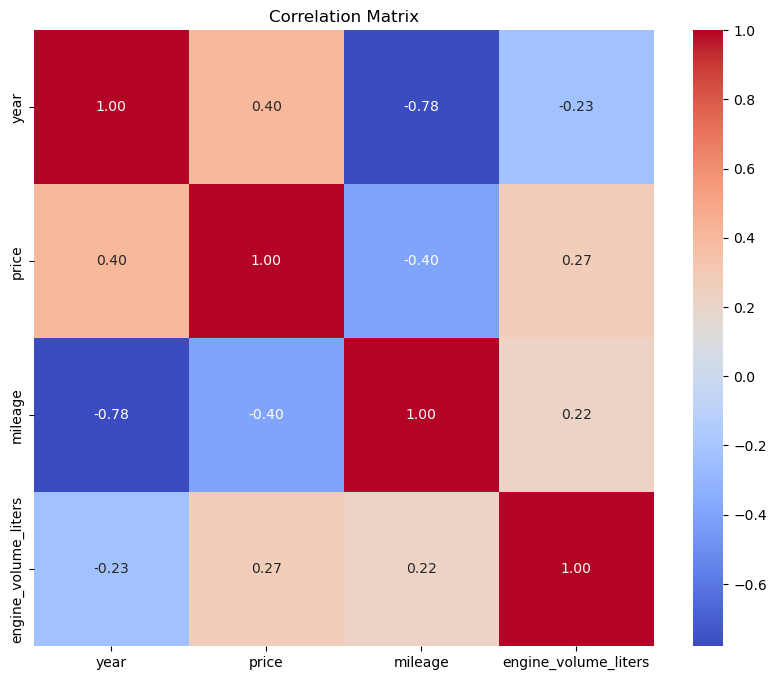

In [58]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

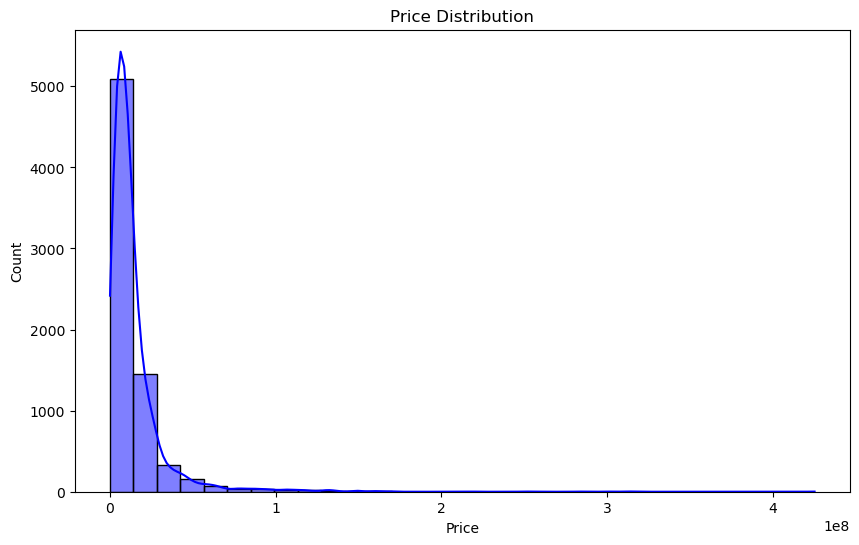

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

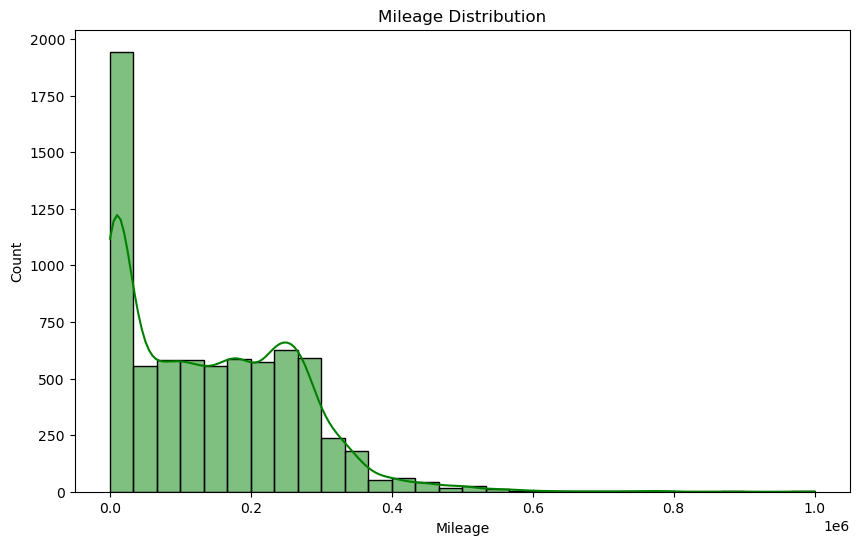

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mileage'], kde=True, bins=30, color='green')
plt.title('Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.show()

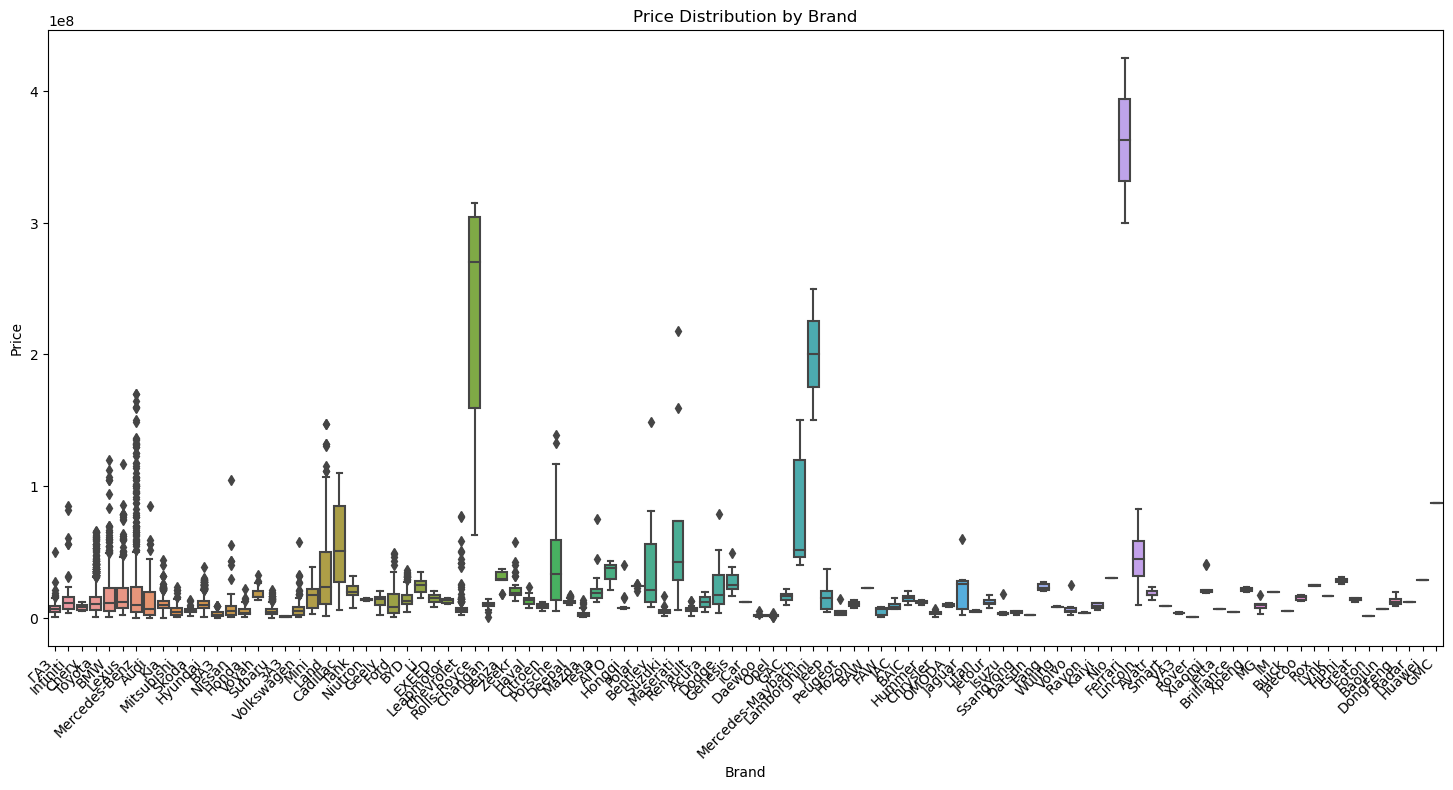

In [61]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

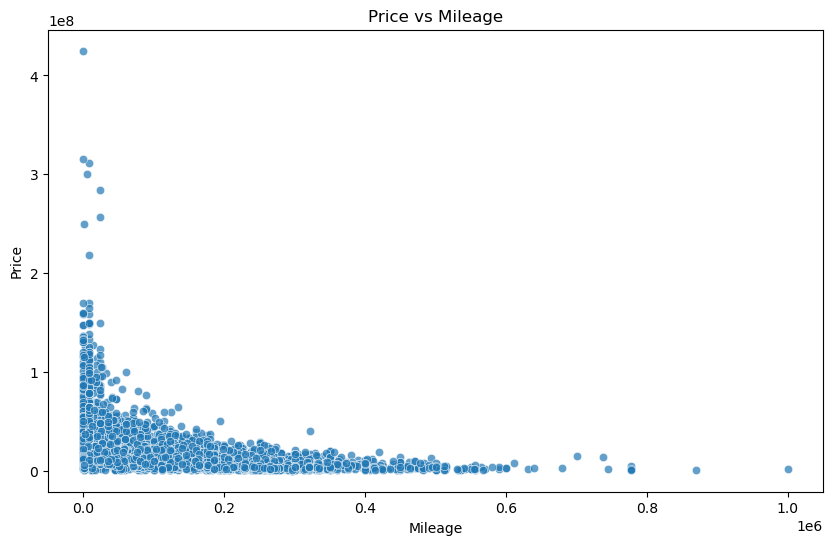

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=df, alpha=0.7)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

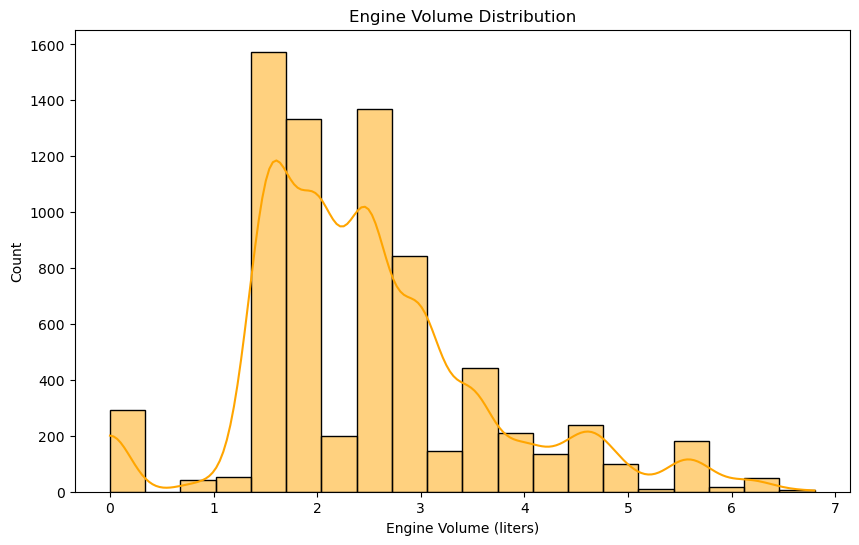

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df['engine_volume_liters'], kde=True, bins=20, color='orange')
plt.title('Engine Volume Distribution')
plt.xlabel('Engine Volume (liters)')
plt.ylabel('Count')
plt.show()

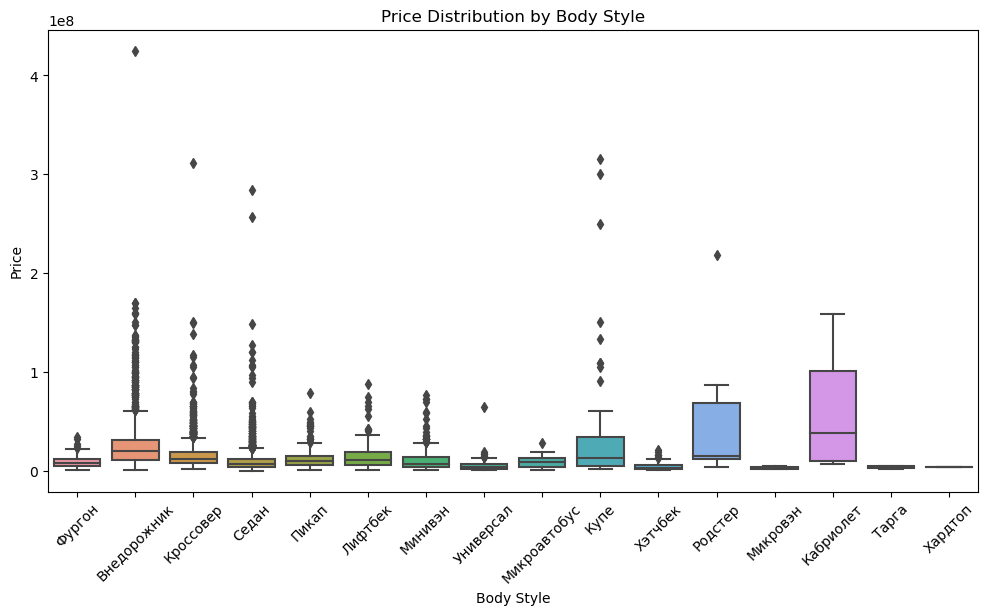

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='body_style', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.show()

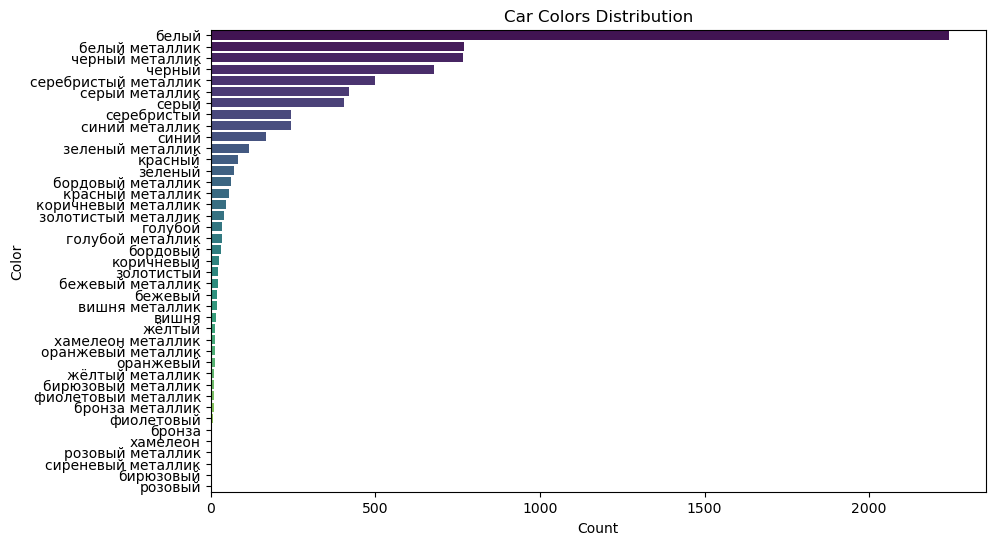

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(y='color', data=df, order=df['color'].value_counts().index, palette='viridis')
plt.title('Car Colors Distribution')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

/var/folders/bj/818f_3ds0qn5fsqkh5fhm9rh0000gn/T/ipykernel_65224/4220255978.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='price', data=df, ci=None)


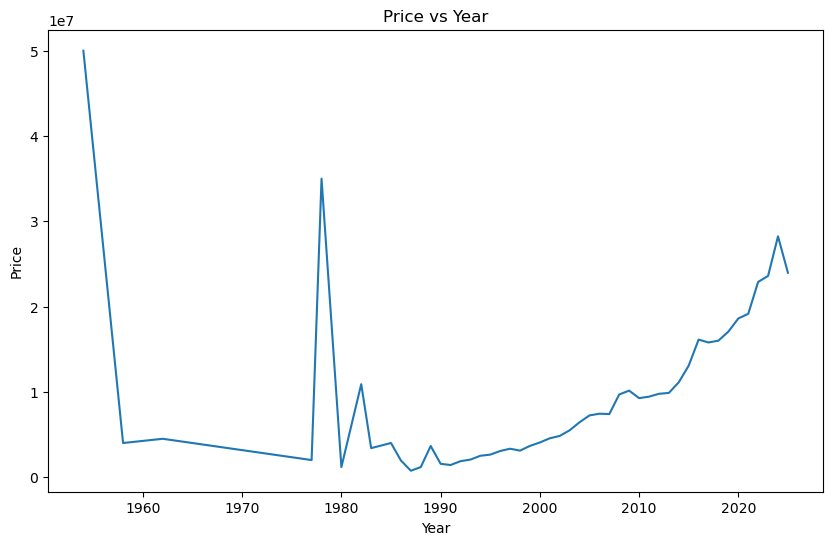

In [66]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='price', data=df, ci=None)
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

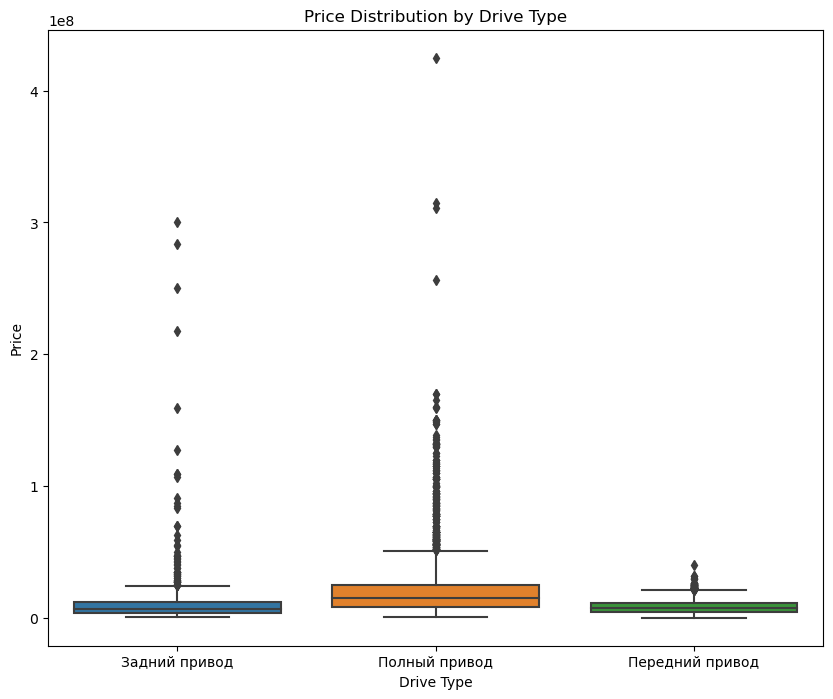

In [67]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='drive_type', y='price', data=df)
plt.title('Price Distribution by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Price')
plt.show()

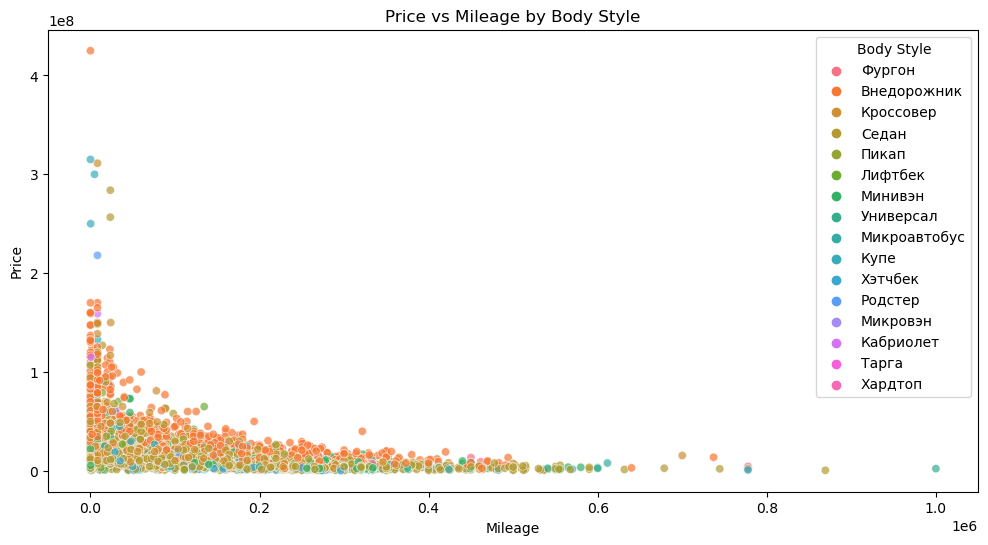

In [68]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='mileage', y='price', hue='body_style', data=df, alpha=0.7)
plt.title('Price vs Mileage by Body Style')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Body Style')
plt.show()

In [69]:
import plotly.express as px

fig = px.treemap(df, path=['brand', 'model'], values=None)
fig.update_layout(title="Model Distribution by Brand and model Style")
fig.show()